In the assessment you will implement a linear model for a set of 20 x/y data points.

We assume that the data can be described by a straight line with the slope a through the origin and an intercept b.
$$ y = a * x + b $$

In [1]:
import numpy as np
import pandas as pd

### Task 1
Read the x/y data points from the file datapoints.csv into Python 

In [2]:
points_df = pd.read_csv('C:\\chr\\programming\\Notebooks\\datapoints.csv')
points_df

,x,y
0,0.000000,0.496714
1,0.052632,0.019630
2,0.105263,0.963478
3,0.157895,1.996714
4,0.210526,0.397426
5,0.263158,0.555337
6,0.315789,2.526581
7,0.368421,1.872698
8,0.421053,0.793684
9,0.473684,1.963613


### Task 2
Create a scatterplot of the data.

In [3]:
import matplotlib.pyplot as plt

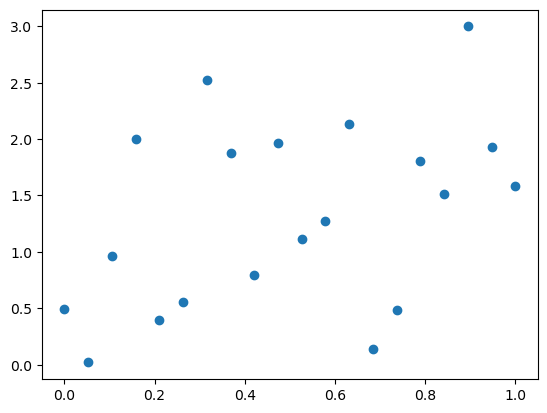

In [4]:
plt.scatter(points_df.x,points_df.y)

### Task 3
Set the slope a to 10 and the intercept b to 0. Calculate y for every value of x. 

In [5]:
yy = 10 * points_df.x
yy

0      0.000000
1      0.526316
2      1.052632
3      1.578947
4      2.105263
5      2.631579
6      3.157895
7      3.684211
8      4.210526
9      4.736842
10     5.263158
11     5.789474
12     6.315789
13     6.842105
14     7.368421
15     7.894737
16     8.421053
17     8.947368
18     9.473684
19    10.000000
Name: x, dtype: float64

### Task 4

Calculate the Mean Squared Error (MSE) of y and ytrue using the formula:
$$ MSE = 1/N∑(y−ytrue)2 

In [6]:
n, _ = points_df.shape
mse = (1/n)*((yy - points_df.y)**2).sum()
mse

21.306499419071017


### Task 5
Find a value for a that gives the lowest possible MSE. Implement the following procedure:

    initially set a to 10
    repeat the following procedure 100 times:
        decrease a by 0.1
        re-calculate y using the modified a
        re-calculate the MSE
        check if the new MSE is smaller than the previous one
        if it is smaller, keep the new values for the MSE and a, otherwise discard it 
    print the final value for a and the corresponding MSE



In [7]:
a = 10
best_mse = mse
for c0 in range(0, 100):
    a -= 0.1
    yy = a * points_df.x
    mse = (1/n)*((points_df.y - yy)**2).sum()
    if(mse < best_mse):
        best_mse = mse
        best_a = a

best_mse, best_a

(0.7080422372498424, 2.2000000000000197)

### Task 6
Also modify b in the above procedure.

In [8]:
# considering that a = best_a
b = 10
best_mse = mse
for c0 in range(0, 100):
    b -= 0.1
    yy = best_a * points_df.x + b
    mse = (1/n)*((points_df.y - yy)**2).sum()
    if(mse < best_mse):
        best_mse = mse
        best_b = b

best_mse, best_b

(0.6565616618265768, 0.2000000000000188)

### Task 7
How could the algorithm be improved? Write down one or two ideas.

#### Answer:
An algorithm can be implemented that can adjust the parameters `a` and `b` by itself.  
The error function is the MSE that is already written above.  
We start with some random values for `a` and `b` and gradually they are going to be improved.

In [11]:
a = 10
b = -2
a, b

(10, -2)

Here is the error given `a` and `b`:

In [13]:
yy = a * points_df.x + b
mse = (1/n)*((yy - points_df.y)**2).sum()
mse

10.621305173303698

The linear function `yy` returns some outputs for all x points in the dataset given `a` and `b`. This however diverges from the real outputs in the dataset. The amount of the deviation is given by the `mse` function. The gradient of the `mse` can show in which direction the parameters can be updated, so that the gradient of `mse` is close to 0, which means that `mse` is close to a minimum.

$$
\nabla MSE = \frac{\partial MSE}{\partial a} , \frac{\partial MSE}{\partial b} <=>
$$
$$
\frac{\partial MSE}{\partial a} = \frac{1}{n} \frac{\partial (yy - y)^2}{\partial a} = \frac{1}{n} 2(yy - y) * \frac{\partial (yy - y)}{\partial a}
$$
$$
= \frac{1}{n} 2(yy - y) * \frac{\partial (a x + b - y)}{\partial a}
$$
$$
= \frac{1}{n} 2(yy - y) * ( \frac{\partial (a x)}{\partial a} + \frac{\partial (b - y)}{\partial a} )
$$
$$
= \frac{1}{n} 2(yy - y) * x

Respectively  

$$
\frac{\partial MSE}{\partial b} = \frac{1}{n} 2(yy - y)

In [14]:
df_da = (2/n)*((yy - points_df.y) * points_df.x).sum()
df_db = (2/n)*(yy - points_df.y).sum()
df_da, df_db

(3.3092488964548057, 3.3425971228836575)

Finally `a` and `b` are updated towards the direction to the minimum of the `mse` function. A coefficient `h` is multiplied to `df_da` and `df_db` so that the function can reach the local minimum.

In [ ]:
h = 0.01
a = a - df_da*h
b = b - df_db*h
a, b

(0.97684736272093, 5.997187825532295)

In [ ]:
yy = a * points_df.x + b
mse = (1/n)*((yy - points_df.y)**2).sum()
mse

27.141272183420952

The error seems to decrease. After some more iterations it is expected that the error gets even smaller:

In [ ]:
for c0 in range(0,100):
    yy = a * points_df.x + b
    df_da = (2/n)*((yy - points_df.y) * points_df.x).sum()
    df_db = (2/n)*(yy - points_df.y).sum()
    a = a - df_da*h
    b = b - df_db*h

(df_da, df_db), (a, b)

((0.14131985820591766, 0.9490970658620924),
 (-0.7020992514460603, 2.144102027262597))

In [ ]:
mse = (1/n)*((points_df.y - yy)**2).sum()
mse

1.0725541653773074

The error is near to the algorithms in tasks 5 & 6. After some more iterations it could get smaller than the minimum error of those algorithms.

In [ ]:
for c0 in range(0,1000):
    yy = a * points_df.x + b
    df_da = (2/n)*((yy - points_df.y) * points_df.x).sum()
    df_db = (2/n)*(yy - points_df.y).sum() 
    a = a - df_da*h
    b = b - df_db*h

(df_da, df_db), (a, b)

((-0.06717297896178999, 0.03621376905007152),
 (0.6459935093621177, 1.0237852956064561))

In [ ]:
mse = (1/n)*((points_df.y - yy)**2).sum()
mse

0.5660278293500813